# Exploring the affect of the Month of Release on a Movie 

# Will Also explore the day of the week

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('cleandata/movierevenue.csv',index_col = 0)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,daynumber,month,markup,profitmargin,netprofit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,4,12,5.532577,0.846921,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,4,5,1.546673,0.607331,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,4,6,-0.572108,-1.337036,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,4,5,3.243841,0.764364,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,4,12,3.153696,0.759251,999721747


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 15 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
year_released        5782 non-null int64
age                  5782 non-null int64
decades              5782 non-null int64
day                  5782 non-null object
daynumber            5782 non-null int64
month                5782 non-null int64
markup               5782 non-null float64
profitmargin         5782 non-null float64
netprofit            5782 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 722.8+ KB


In [18]:
df.groupby('day')['worldwide_gross'].count().sort_values(ascending = False)

day
Friday       4539
Wednesday     621
Tuesday       290
Thursday      172
Monday         59
Saturday       56
Sunday         45
Name: worldwide_gross, dtype: int64

# Checking Distribution of Data

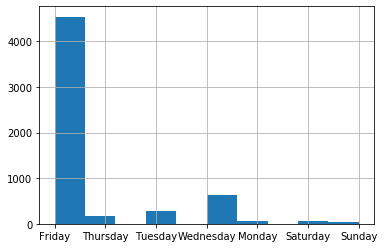

In [19]:
df['day'].hist()

mean      9.148746e+07
median    2.798445e+07
Name: worldwide_gross, dtype: float64

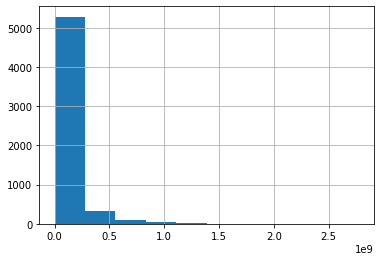

In [20]:
df['worldwide_gross'].hist()
df['worldwide_gross'].agg(['mean','median'])

mean      5.989970e+07
median    8.550286e+06
Name: netprofit, dtype: float64

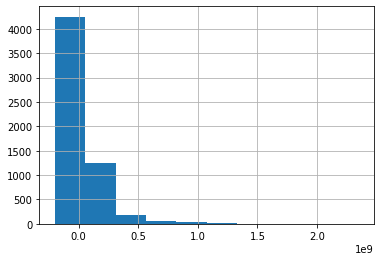

In [21]:
df['netprofit'].hist()
df['netprofit'].agg(['mean','median'])

mean      7.050675
median    7.000000
Name: month, dtype: float64

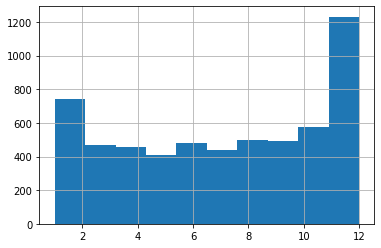

In [22]:
df['month'].hist()
df['month'].agg(['mean','median'])

In [23]:
# data is skewed 

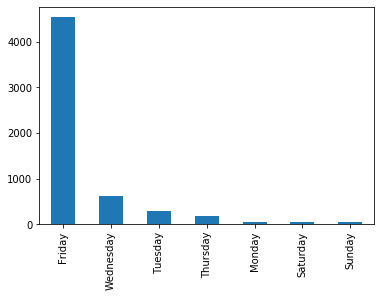

In [24]:
df['day'].value_counts().plot(kind= 'bar')

# From this it is clear that Friday is the most popular choice of day to release a movie
**Let's explore this further**

Text(0, 0.5, ' Gross Revenue (Billions USD)')

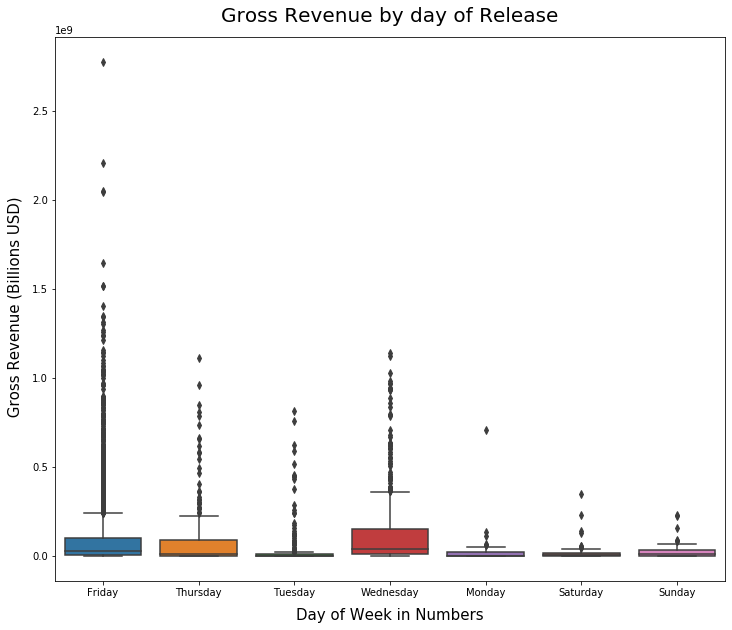

In [25]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(12,10))
ax = sns.boxplot(x='day',y='worldwide_gross', data=df)
ax.set_title("Gross Revenue by day of Release", size = 20, pad = 15);


ax.set_xlabel("Day of Week in Numbers", size = 15, labelpad = 10)
ax.set_ylabel(" Gross Revenue (Billions USD)", size = 15, labelpad =10)

In [26]:
df.groupby('daynumber')['worldwide_gross'].mean()

daynumber
0    2.813124e+07
1    3.344983e+07
2    1.220360e+08
3    1.083977e+08
4    9.260652e+07
5    2.412489e+07
6    3.332323e+07
Name: worldwide_gross, dtype: float64

In [27]:
df.groupby('day')['worldwide_gross'].median().sort_values(ascending = False)

day
Wednesday    41560117.0
Friday       31222395.0
Thursday     13796144.5
Sunday        9370285.0
Saturday      3414200.0
Monday        1050861.0
Tuesday          6089.5
Name: worldwide_gross, dtype: float64

Text(0, 0.5, ' Gross Revenue (Billions USD)')

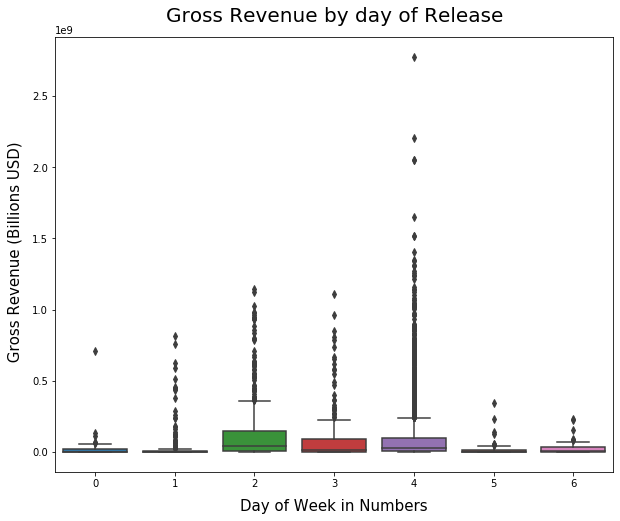

In [28]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax = sns.boxplot(x='daynumber',y='worldwide_gross', data=df)
ax.set_title("Gross Revenue by day of Release", size = 20, pad = 15);


ax.set_xlabel("Day of Week in Numbers", size = 15, labelpad = 10)
ax.set_ylabel(" Gross Revenue (Billions USD)", size = 15, labelpad =10)


# Grouped by sum


In [34]:

gross_median_day = pd.DataFrame(df.groupby('day')['worldwide_gross'].median())
gross_median_day.reset_index(inplace = True)
gross_median_day


,day,worldwide_gross
0,Friday,31222395.0
1,Monday,1050861.0
2,Saturday,3414200.0
3,Sunday,9370285.0
4,Thursday,13796144.5
5,Tuesday,6089.5
6,Wednesday,41560117.0


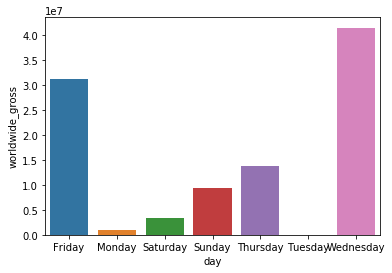

In [35]:
sns.barplot(data=gross_median_day, x='day',y='worldwide_gross')

# Grouped by Mean

In [238]:
gross_mean_day = pd.DataFrame(df.groupby('day')['worldwide_gross'].mean())
gross_mean_day.reset_index(inplace = True)
gross_mean_day


,day,worldwide_gross
0,Friday,9.260652e+07
1,Monday,2.813124e+07
2,Saturday,2.412489e+07
3,Sunday,3.332323e+07
4,Thursday,1.083977e+08
5,Tuesday,3.344983e+07
6,Wednesday,1.220360e+08


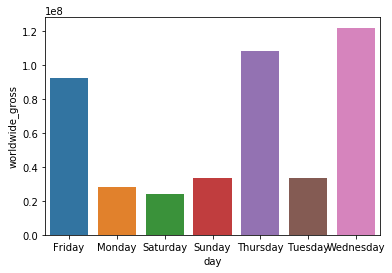

In [239]:
sns.barplot(data=gross_mean_day, x='day',y='worldwide_gross')

# Now Let's Explore the effect of the month of release

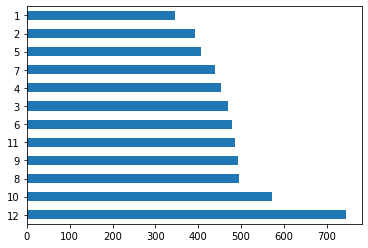

In [240]:
df['month'].value_counts().plot(kind= 'barh')

The month of release is distributed far more evenly than the day - With December being most popular

# Box plots for Release Month

Text(0, 0.5, ' Worldwide Gross ( USD) ')

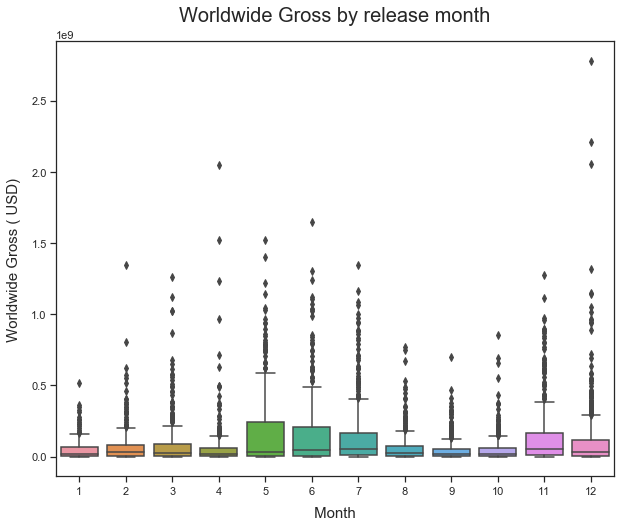

In [79]:
sns.set(style='ticks')

fig, axes=plt.subplots(nrows=1, ncols=1 , figsize=(10,8))
ax = sns.boxplot(x='month',y='worldwide_gross', data=df)
ax.set_title("Worldwide Gross by release month", pad = 20, size = 20);

ax.set_xlabel(' Month ', labelpad = 10, size = 15)
ax.set_ylabel(' Worldwide Gross ( USD) ', labelpad = 10, size = 15)

# Sum

In [94]:
gross_sum_month = pd.DataFrame(df.groupby('month')['worldwide_gross'].sum().sort_values(ascending = False))
gross_sum_month.reset_index(inplace = True)
gross_sum_month


,month,worldwide_gross
0,12,75761412153
1,6,68268531657
2,5,66043077615
3,11,65970430672
4,7,62023990453
5,3,37897684431
6,8,30245291880
7,10,28343193867
8,2,28045454121
9,4,27203797390


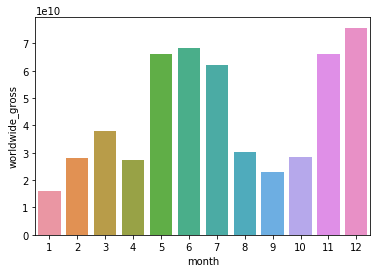

In [95]:
sns.barplot(data=gross_sum_month, x='month',y='worldwide_gross')

# Mean

In [37]:
gross_mean_month = pd.DataFrame(df.groupby('month')['worldwide_gross'].mean().sort_values(ascending = False))
gross_mean_month.reset_index(inplace = True)
gross_mean_month


,month,worldwide_gross
0,5,1.622680e+08
1,6,1.425230e+08
2,7,1.409636e+08
3,11,1.357416e+08
4,12,1.016932e+08
5,3,8.063337e+07
6,2,7.154453e+07
7,8,6.097841e+07
8,4,5.992026e+07
9,10,4.946456e+07


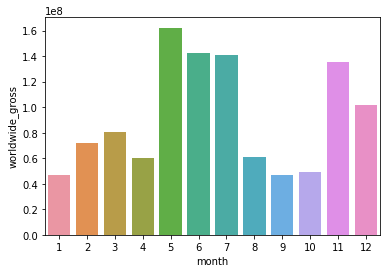

In [38]:
sns.barplot(data=gross_mean_month, x='month',y='worldwide_gross')

# Median

In [39]:
gross_median_month = pd.DataFrame(df.groupby('month')['worldwide_gross'].median().sort_values(ascending = False))
gross_median_month.reset_index(inplace = True)
gross_median_month

,month,worldwide_gross
0,7,51134699.5
1,11,50530475.5
2,6,46844357.0
3,2,33097834.5
4,12,31166312.0
5,5,29934477.0
6,3,25599836.0
7,8,24202936.5
8,1,20169934.0
9,4,20068010.0


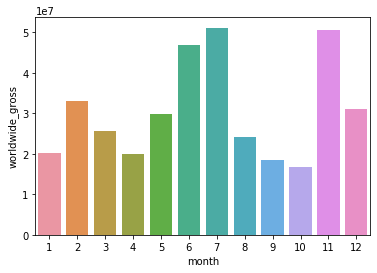

In [40]:
sns.barplot(data=gross_median_month, x='month',y='worldwide_gross')

# Calling the last 4 decades dataframe I made in Question 1 notebook

In [42]:
%store -r dfyears2010
%store -r df4decades


In [43]:
df4decades

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,2000s,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,2010s,Friday,5,1.546673,0.607331,635063875,4,Pirates of the Caribbean: On Stranger Tides 20...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,2010s,Friday,6,-0.572108,-1.337036,-200237650,4,Dark Phoenix 2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,2010s,Friday,5,3.243841,0.764364,1072413963,4,Avengers: Age of Ultron 2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,2010s,Friday,12,3.153696,0.759251,999721747,4,Star Wars Ep. VIII: The Last Jedi 2017-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018,2,2010s,Monday,12,-1.000000,-inf,-7000,0,Red 11 2018-12-31
5778,79,1999-04-02,Following,6000,48482,240495,1999,21,1990s,Friday,4,39.082500,0.975051,234495,4,Following 1999-04-02
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,15,2000s,Wednesday,7,-0.732400,-2.736921,-3662,2,Return to the Land of Wonders 2005-07-13
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015,5,2010s,Tuesday,9,-1.000000,-inf,-1400,1,A Plague So Pleasant 2015-09-29


In [44]:
%store dfyears2010

Stored 'dfyears2010' (DataFrame)


In [45]:
%store -r df2010
%store -r df2000
%store -r df1990
%store -r df1980


In [46]:
df2010.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,4,Pirates of the Caribbean: On Stranger Tides 20...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650,4,Dark Phoenix 2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,4,Avengers: Age of Ultron 2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747,4,Star Wars Ep. VIII: The Last Jedi 2017-12-15
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,5,0,Friday,12,5.710167,0.850972,1747311220,4,Star Wars Ep. VII: The Force Awakens 2015-12-18


# Making Data Frames for the median Worldwide Gross for each decade for comparison 

In [49]:
avg1980 = pd.DataFrame(df1980.groupby('month')['worldwide_gross'].median())
avg1980.reset_index(inplace = True)
avg1980

avg1990 = pd.DataFrame(df1990.groupby('month')['worldwide_gross'].median())
avg1990.reset_index(inplace = True)
avg1990

avg2000 = pd.DataFrame(df2000.groupby('month')['worldwide_gross'].median())
avg2000.reset_index(inplace = True)
avg2000

avg2010 = pd.DataFrame(df2010.groupby('month')['worldwide_gross'].median())
avg2010.reset_index(inplace = True)
avg2010

,month,worldwide_gross
0,1,41224421.0
1,2,43953337.0
2,3,19599974.0
3,4,17478366.5
4,5,48249489.0
5,6,38952463.5
6,7,61449135.0
7,8,40585745.5
8,9,21970000.0
9,10,15505922.0


In [56]:
avg1990

,month,worldwide_gross
0,1,10013789.5
1,2,23360779.0
2,3,24355762.0
3,4,22032635.0
4,5,26936265.0
5,6,149488425.5
6,7,71743823.0
7,8,21171695.0
8,9,15471969.0
9,10,15900113.0


(0, 160000000)

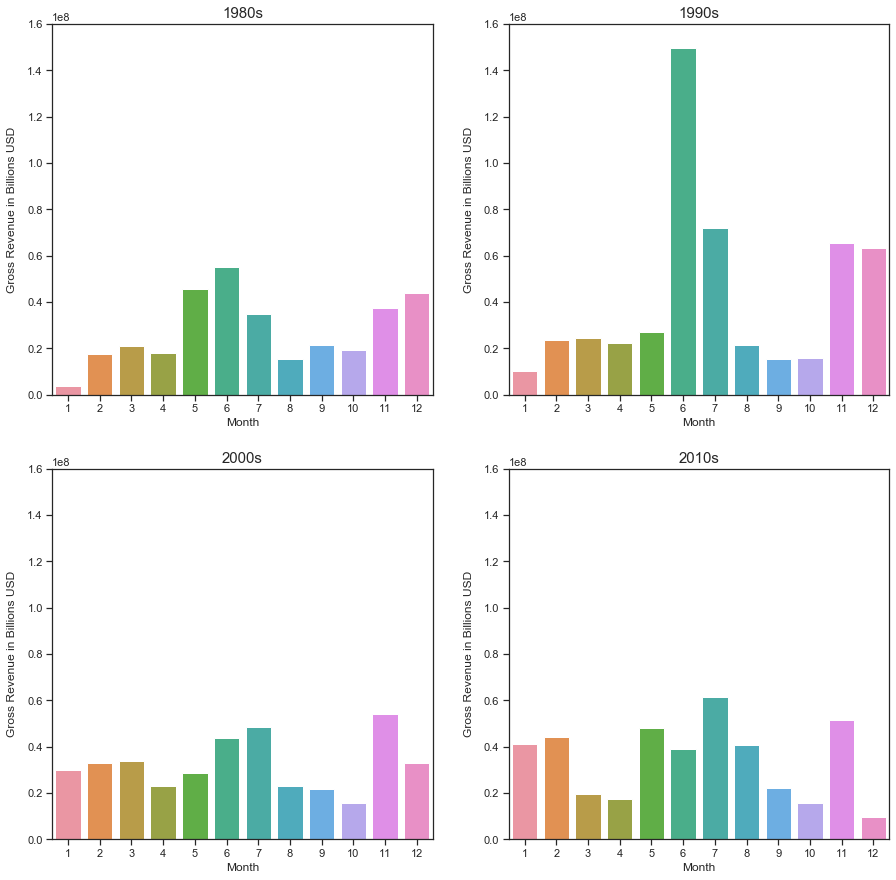

In [85]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax = axes[0][0]
ax1 = axes[0][1]
ax2 = axes[1][0]
ax3 = axes[1][1]

sns.barplot(x='month',y='worldwide_gross',data=avg1980, ax = ax)
sns.barplot(x='month',y='worldwide_gross',data=avg1990, ax = ax1)
sns.barplot(x='month',y='worldwide_gross',data=avg2000, ax = ax2)
sns.barplot(x='month',y='worldwide_gross',data=avg2010, ax = ax3)
ax.set_title('1980s', size = 15)
ax1.set_title('1990s', size = 15)
ax2.set_title('2000s', size = 15)
ax3.set_title('2010s', size = 15)

ax.set_xlabel('Month')
ax1.set_xlabel('Month')
ax2.set_xlabel('Month')
ax3.set_xlabel('Month')

ax.set_ylabel('Gross Revenue in Billions USD',labelpad = 10, size = 12)
ax1.set_ylabel('Gross Revenue in Billions USD',labelpad = 10, size = 12)
ax2.set_ylabel('Gross Revenue in Billions USD',labelpad = 10, size = 12)
ax3.set_ylabel('Gross Revenue in Billions USD',labelpad = 10, size = 12)



ax.set_ylim(0,160000000)
ax1.set_ylim(0,160000000)
ax2.set_ylim(0,160000000)
ax3.set_ylim(0,160000000)


In [19]:
df1990.groupby('day')['worldwide_gross'].agg(['mean','median','sum'])

,mean,median,sum
day,,,
Friday,7.388271e+07,28983573.5,60140522020
Monday,2.813374e+07,1050861.0,140668725
Saturday,8.048604e+07,34961178.5,482916216
Sunday,1.061545e+07,2022893.0,53077255
Thursday,1.449939e+08,69489765.0,1739927139
Tuesday,1.943370e+08,28871190.0,2915054488
Wednesday,1.276986e+08,47407635.0,15962323471


In [21]:
df1980['worldwide_gross'].sum()

21414092749

In [23]:
df1980.sort_values(by = 'day',ascending = False)
df1990.sort_values(by = 'day',ascending = False)
df2000.sort_values(by = 'day',ascending = False)
df2010.sort_values(by = 'day',ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
1458,59,2012-12-19,The Guilt Trip,40000000,37134215,41294674,2012,8,0,Wednesday,12,0.032367,0.031352,1294674,2,The Guilt Trip 2012-12-19
236,37,2014-11-26,Penguins of Madagascar,132000000,83350911,366942531,2014,6,0,Wednesday,11,1.779868,0.640271,234942531,2,Penguins of Madagascar 2014-11-26
201,2,2012-11-21,Rise of the Guardians,145000000,103412758,306900902,2012,8,0,Wednesday,11,1.116558,0.527535,161900902,2,Rise of the Guardians 2012-11-21
5501,2,2014-12-31,Rise Of the Entrepreneur - The Search For A Be...,450000,0,0,2014,6,0,Wednesday,12,-1.000000,-inf,-450000,2,Rise Of the Entrepreneur - The Search For A Be...
212,13,2013-03-27,G.I. Joe: Retaliation,140000000,122523060,375740705,2013,7,0,Wednesday,3,1.683862,0.627403,235740705,2,G.I. Joe: Retaliation 2013-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,59,2017-09-15,mother!,30000000,17800004,42531076,2017,3,0,Friday,9,0.417703,0.294633,12531076,4,mother! 2017-09-15
1957,58,2011-08-19,Fright Night,30000000,18298649,40520649,2011,9,0,Friday,8,0.350688,0.259637,10520649,4,Fright Night 2011-08-19
1954,55,2017-04-28,Baahubali 2: The Conclusion,30000000,18985794,263502914,2017,3,0,Friday,4,7.783430,0.886149,233502914,4,Baahubali 2: The Conclusion 2017-04-28
1952,53,2013-10-04,Runner Runner,30000000,19316646,60512680,2013,7,0,Friday,10,1.017089,0.504236,30512680,4,Runner Runner 2013-10-04


In [24]:
df1990.groupby('day')['worldwide_gross'].median().sort_values(ascending = False)

day
Thursday     69489765.0
Wednesday    47407635.0
Saturday     34961178.5
Friday       28983573.5
Tuesday      28871190.0
Sunday        2022893.0
Monday        1050861.0
Name: worldwide_gross, dtype: float64

# Day of Release over 4 decades

Text(0.5, 0, 'Day of Week')

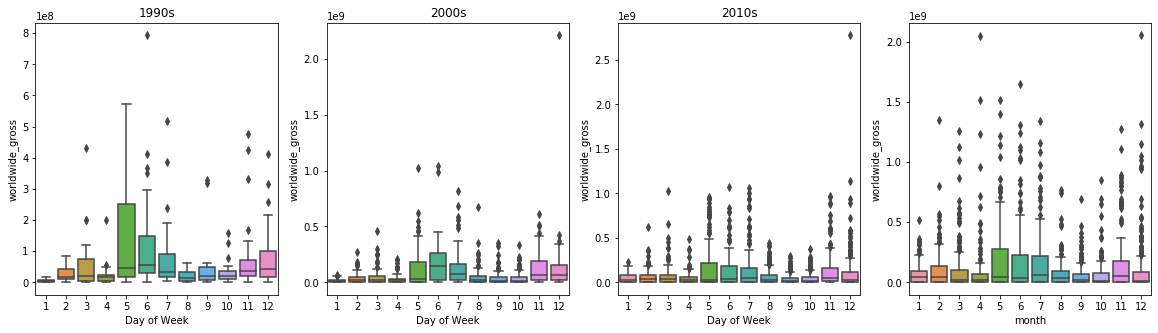

In [152]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)

# Add a second subplot to the figure - a new axes
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.boxplot(x='month',y='worldwide_gross',data=df1980, ax = ax1)
sns.boxplot(x='month',y='worldwide_gross',data=df1990, ax = ax2)
sns.boxplot(x='month',y='worldwide_gross',data=df2000, ax = ax3)
sns.boxplot(x='month',y='worldwide_gross',data=df2010, ax = ax4)
ax.set_title('1980s')
ax1.set_title('1990s')
ax2.set_title('2000s')
ax3.set_title('2010s')

ax.set_xlabel('Day of Week')
ax1.set_xlabel('Day of Week')
ax2.set_xlabel('Day of Week')
ax3.set_xlabel('Day of Week')


In [1]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)

# Add a second subplot to the figure - a new axes
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.boxplot(x='daynumber',y='worldwide_gross',data=df1980, ax = ax1)
sns.boxplot(x='daynumber',y='worldwide_gross',data=df1990, ax = ax2)
sns.boxplot(x='daynumber',y='worldwide_gross',data=df2000, ax = ax3)
sns.boxplot(x='daynumber',y='worldwide_gross',data=df2010, ax = ax4)
ax1.set_title('1980s')
ax2.set_title('1990s')
ax3.set_title('2000s')
ax4.set_title('2010s')

ax1.set_xlabel('Day of Week')
ax2.set_xlabel('Day of Week')
ax3.set_xlabel('Day of Week')
ax4.set_xlabel('Day of Week')

NameError: name 'plt' is not defined

Text(0.5, 0, 'Day of Week')

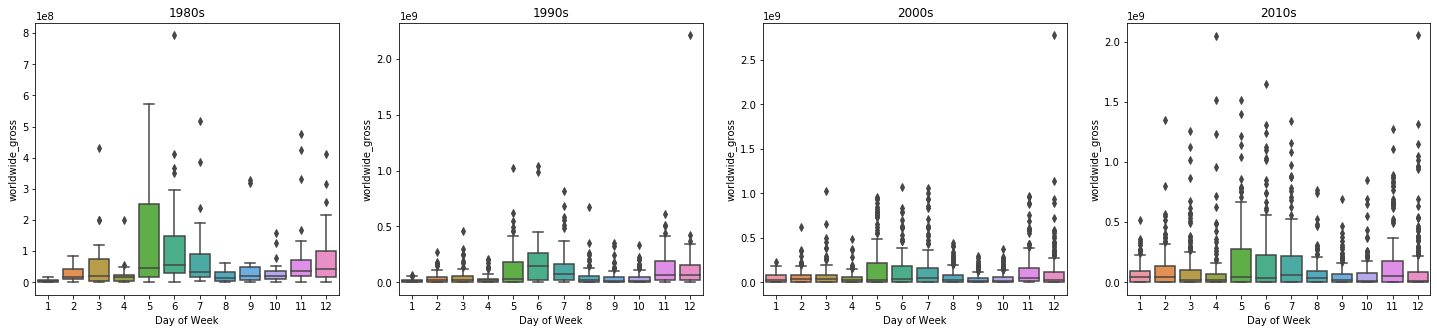

In [193]:
new_figure = plt.figure(figsize=(25,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)

# Add a second subplot to the figure - a new axes
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)


sns.boxplot(x='month',y='worldwide_gross',data=df1980, ax = ax1)
sns.boxplot(x='month',y='worldwide_gross',data=df1990, ax = ax2)
sns.boxplot(x='month',y='worldwide_gross',data=df2000, ax = ax3)
sns.boxplot(x='month',y='worldwide_gross',data=df2010, ax = ax4)
ax1.set_title('1980s')
ax2.set_title('1990s')
ax3.set_title('2000s')
ax4.set_title('2010s')

ax1.set_xlabel('Day of Week')
ax2.set_xlabel('Day of Week')
ax3.set_xlabel('Day of Week')
ax4.set_xlabel('Day of Week')


In [287]:
median1990 = pd.DataFrame(df1990.groupby('day')['worldwide_gross'].count())
median1990.reset_index(inplace = True)
median1980 = pd.DataFrame(df1980.groupby('day')['worldwide_gross'].count())
median1980.reset_index(inplace = True)
median2000 = pd.DataFrame(df2000.groupby('day')['worldwide_gross'].count())
median2000.reset_index(inplace = True)
median2010 = pd.DataFrame(df2010.groupby('day')['worldwide_gross'].count())
median2010.reset_index(inplace = True)